In [142]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
import warnings
warnings.filterwarnings('ignore')

# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
1) Delivery_time -> Predict delivery time using sorting time 

Step1:Read the data

In [144]:
sal=pd.read_csv('Salary_Data.csv')
salary=pd.DataFrame(sal)
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Step2:Extract the information

In [145]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [146]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Step3:Perform the necessary Exploratory Data Analysis

In [147]:
salary.rename(columns={'YearsExperience':'Experience'},inplace=True) #CHANGE THE NAME FOR CONVENIENCE
salary.head()

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Step3.1 : Performing some basic Statistics

In [148]:
mean_experience=salary['Experience'].mean()
mean_salary=salary['Salary'].mean()
std_experience=salary['Experience'].std()
std_salary=salary['Experience'].std()
variance_experience=np.sqrt(std_experience)
varaince_salary=np.sqrt(std_salary)
print({
    'Mean_experience': mean_experience,
    'Mean_salary': mean_salary,
    'Std_experience': std_experience,
    'Std_salary': std_salary,
    'Variance_experience': variance_experience,
    'Variance_salary': varaince_salary
})

{'Mean_experience': 5.3133333333333335, 'Mean_salary': 76003.0, 'Std_experience': 2.8378881576627184, 'Std_salary': 2.8378881576627184, 'Variance_experience': 1.6846032641731163, 'Variance_salary': 1.6846032641731163}


In [149]:
salary.duplicated() #To check any value duplicated

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [150]:
salary.isnull().sum() #To check any null value

Experience    0
Salary        0
dtype: int64

<Axes: >

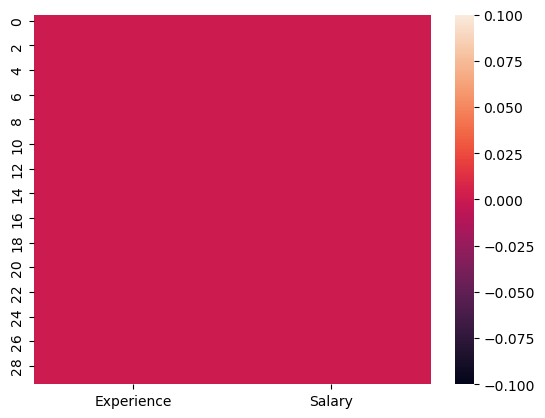

In [151]:
sns.heatmap(salary.isnull())

Step4:Check the plot is linearly distributed 

<Axes: xlabel='Experience', ylabel='Salary'>

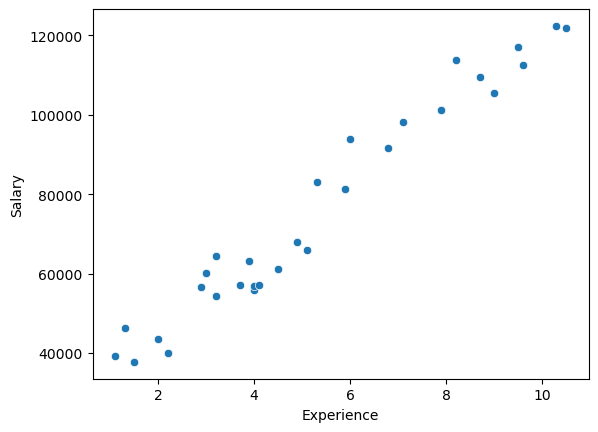

In [152]:
sns.scatterplot(x=salary['Experience'],y=salary['Salary'])

Step5:Check the corelation between datas and plot it

In [153]:
salary.corr()

,Experience,Salary
Experience,1.000000,0.978242
Salary,0.978242,1.000000


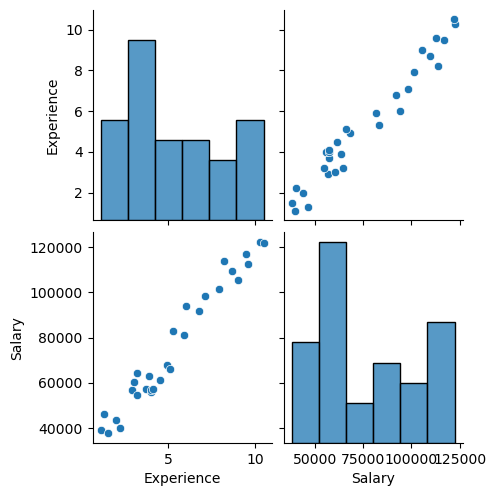

In [154]:
sns.pairplot(salary)

<Axes: >

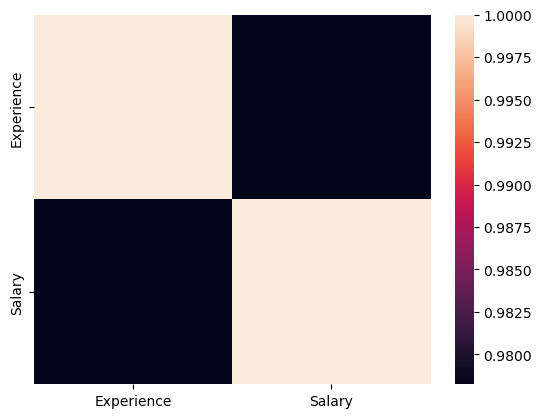

In [155]:
sns.heatmap(salary.corr())

Step6:Check the datas are normally distributed 

<Axes: xlabel='Experience', ylabel='Density'>

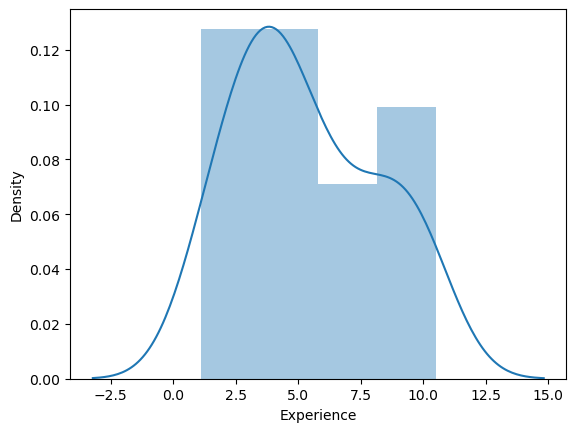

In [156]:
sns.distplot(salary['Experience'])

<Axes: xlabel='Salary', ylabel='Density'>

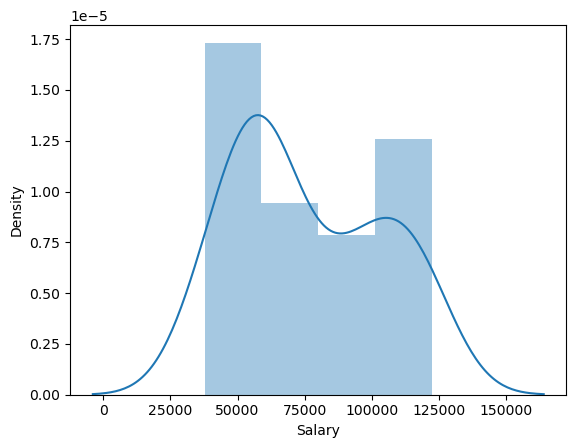

In [157]:
sns.distplot(salary['Salary'])

Step7:Import Model

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [159]:
X=salary['Experience'].values.reshape(-1,1)
y=salary['Salary']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Step7.1:Build Model

In [160]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [161]:
y_pred=model.predict(X_test)
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

<Axes: xlabel='Experience', ylabel='Salary'>

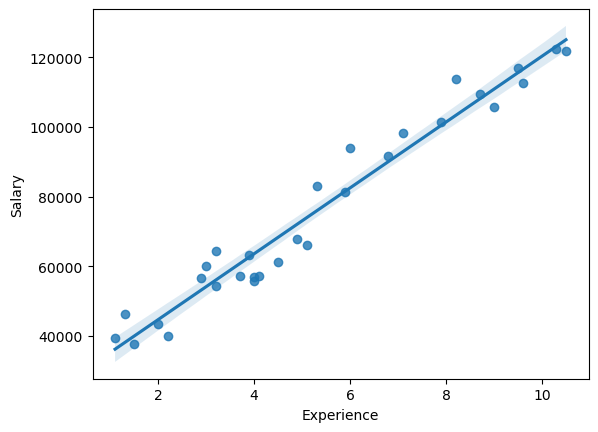

In [162]:
sns.regplot(x="Experience",y="Salary",data=salary)

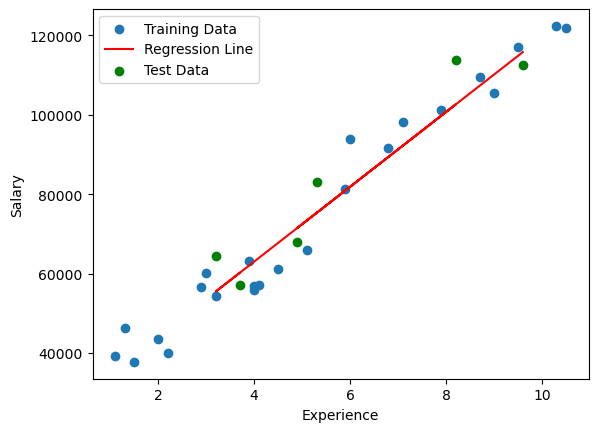

In [163]:
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

Step8:Testing model

In [164]:
#Sample Data having experience of 5 and 7 years
new_data=pd.Series([5,7])

In [165]:
data_pred=pd.DataFrame(new_data,columns=['Experience'])
data_pred

,Experience
0,5
1,7


In [166]:
model.predict(data_pred)

array([72440.65962693, 91288.29027299])

# ---------------------------------------------------------------------------------------------------------------

2) Salary_hike -> Build a prediction model for Salary_hike

Step1:Read the data

In [167]:
deli=pd.read_csv('delivery_time.csv')
delivery=pd.DataFrame(deli)
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Step2:Extract the information

In [168]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [169]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Step3:Perform the necessary Exploratory Data Analysis

In [170]:
delivery.rename(columns={'Delivery Time':'Delivery','Sorting Time':'Sorting'},inplace=True)
delivery['Delivery'].round()
delivery.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [171]:
mean_delivery=delivery['Delivery'].mean()
mean_sorting=delivery['Sorting'].mean()
std_delivery=delivery['Delivery'].std()
std_sorting=delivery['Sorting'].std()
variance_delivery=np.sqrt(std_delivery)
varaince_sorting=np.sqrt(std_sorting)
print({
    'Mean_delivery': mean_delivery,
    'Mean_sorting': mean_sorting,
    'Std_delivery': std_delivery,
    'Std_sorting': std_sorting,
    'Variance_delivery': variance_delivery,
    'Variance_sorting': varaince_sorting
})

{'Mean_delivery': 16.790952380952383, 'Mean_sorting': 6.190476190476191, 'Std_delivery': 5.074900890423285, 'Std_sorting': 2.5420276870846155, 'Variance_delivery': 2.2527540678962907, 'Variance_sorting': 1.5943737601593346}


In [172]:
delivery.duplicated() #To check any value duplicated

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [173]:
delivery.isnull().sum() #To check any null value

Delivery    0
Sorting     0
dtype: int64

<Axes: >

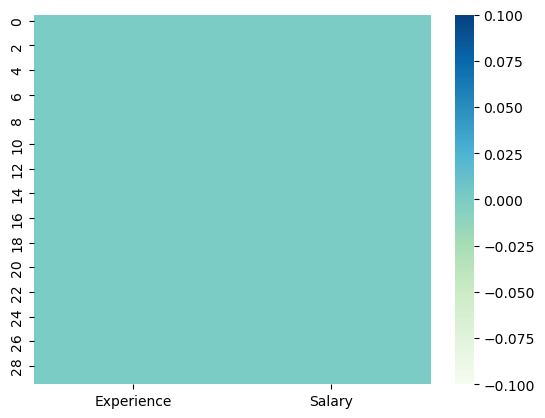

In [174]:
sns.heatmap(salary.isnull(),cmap='GnBu')

Step4:Check the plot is linearly distributed 

<Axes: xlabel='Delivery', ylabel='Sorting'>

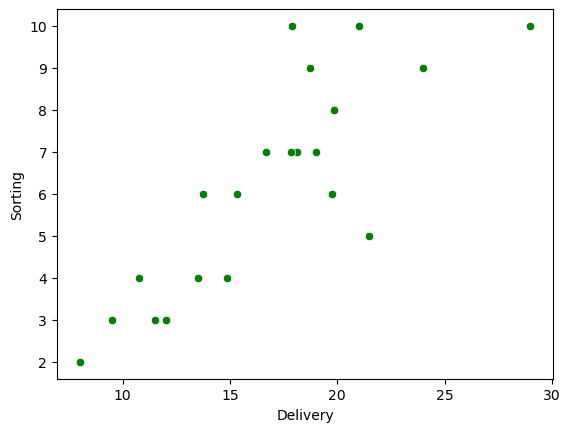

In [175]:
sns.scatterplot(x=delivery['Delivery'],y=delivery['Sorting'],color='g')

Step5:Check the corelation between datas and plot it

In [176]:
delivery.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


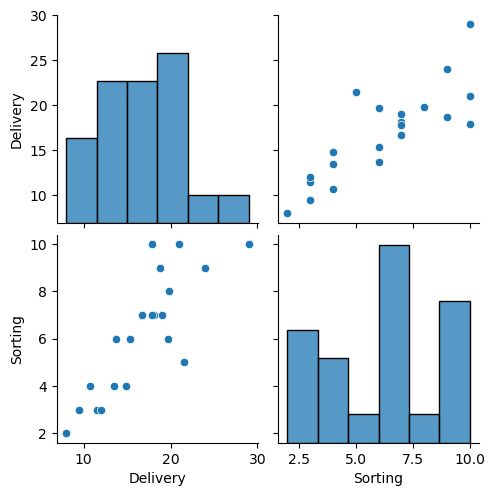

In [177]:
sns.pairplot(delivery)

<Axes: >

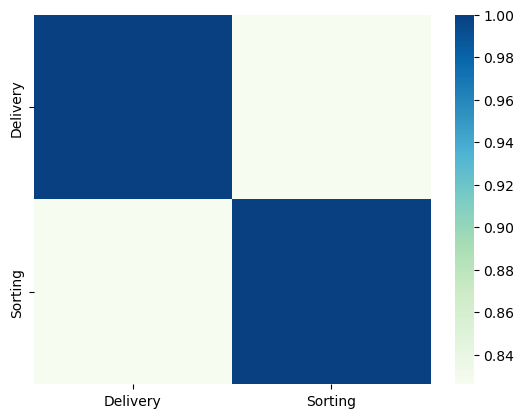

In [178]:
sns.heatmap(delivery.corr(),cmap='GnBu')

Step6:Check the datas are normally distributed 

<Axes: xlabel='Delivery', ylabel='Density'>

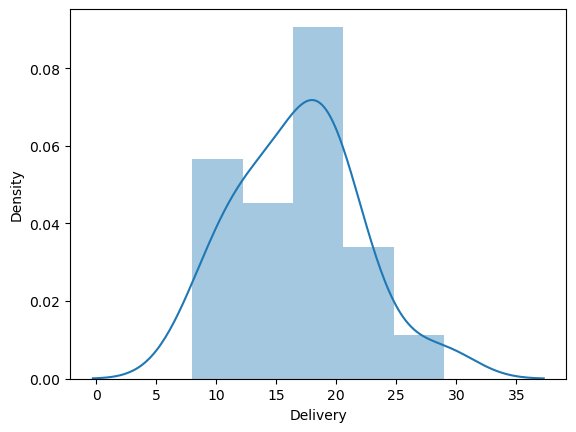

In [179]:
sns.distplot(delivery['Delivery'])

<Axes: xlabel='Sorting', ylabel='Density'>

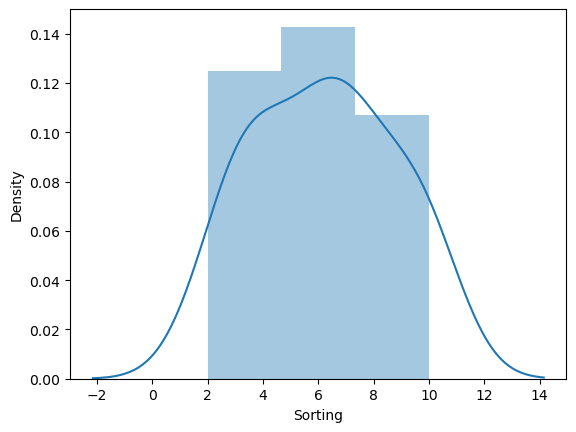

In [180]:
sns.distplot(delivery['Sorting'])

Step7:Import Model

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [182]:
X=delivery['Delivery'].values.reshape(-1,1)
y=delivery['Sorting']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Step7.1:Build Model

In [183]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [184]:
y_pred=model.predict(X_test)
y_pred

array([7.55049807, 6.46609809, 5.25412164, 4.73631127, 6.38730086])

<Axes: xlabel='Delivery', ylabel='Sorting'>

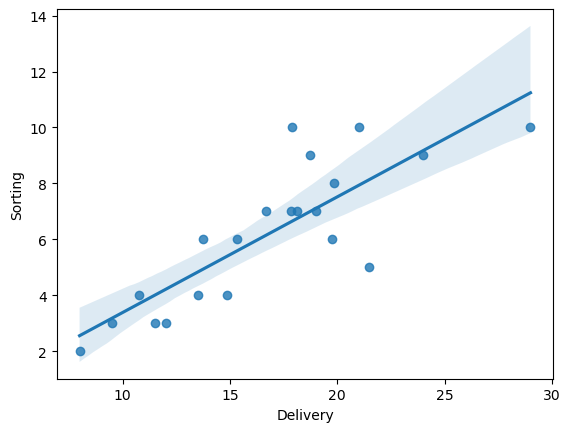

In [185]:
sns.regplot(x='Delivery',y='Sorting',data=delivery)

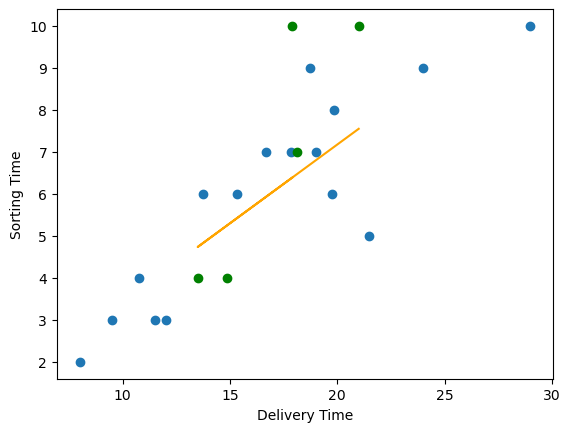

In [186]:
plt.scatter(X_train,y_train,label='Training Data')
plt.plot(X_test,y_pred,color='orange',label="Predicted Data")
plt.scatter(X_test,y_test,color='green',label='Test Data')
plt.legend
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

Step8:Test Model

In [187]:
new_data1=pd.Series([17,18])

In [188]:
ddata=pd.DataFrame(new_data1,columns=['Delivery Time'])
ddata

,Delivery Time
0,17
1,18


In [135]:
model.predict(ddata)

array([6.04959844, 6.42482335])

# ---------------------------------------------------------------------------------------------------------------